<a href="https://colab.research.google.com/github/Ahsa21/colab-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project
# Spam detection

Jeet Purohit,
DVAMI22h
jepu20@student.bth.se

In [ ]:
#imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import entropy
import time
import seaborn as sns

# evaluation measures
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# scalers
from sklearn.preprocessing import StandardScaler

# Algorithms

from sklearn.svm import LinearSVC # SVC impractial with over 10000 samples
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

load dataset

In [ ]:
# load dataset
dataset = pd.read_csv("final_dataset_with_all_features.csv", sep=",")
dataset.head(5)

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,web_ext_ratio,web_unique_domains,web_favicon,web_csp,web_xframe,web_hsts,web_xcontent,web_security_score,web_forms_count,web_password_fields,web_hidden_inputs,web_has_login,web_ssl_valid,web_ext_ratio.1,web_unique_domains.1,web_favicon.1,web_csp.1,web_xframe.1,web_hsts.1,web_xcontent.1,web_security_score.1,web_forms_count.1,web_password_fields.1,web_hidden_inputs.1,web_has_login.1,web_ssl_valid.1,phish_urgency_words,phish_security_words,phish_brand_mentions,phish_brand_hijack,phish_multiple_subdomains,phish_long_path,phish_many_params,phish_suspicious_tld,domain_ngram_entropy,path_depth,path_entropy,subdomain_count,avg_subdomain_len,consonant_ratio,vowel_ratio,digit_ratio,avg_token_length,token_count,label
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,3.375000,0,0.0,0.000000,0.000000,0.000000,3.250000,4,2
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,29,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,2,4.079143,0,0.0,0.000000,0.000000,0.028571,3.750000,8,0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,25,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3,3.708093,0,0.0,0.000000,0.000000,0.032258,4.333333,6,0
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,0,0,7,60,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.000000,1,3.121928,0,0.0,0.470588,0.411765,0.083333,3.941176,17,1
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,0,0,22,199,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.459432,1,3.121928,0,0.0,0.478261,0.434783,0.093617,4.420000,50,1


TEXT OM VAD KLASSERNA ÄR FÖR NÅGOT

In [ ]:
print(f"Total instances: {dataset.shape[0]}, Total Attributes: {dataset.shape[1]}\n")

class0 = (dataset["label"] == 0).sum()
class1 = (dataset["label"] == 1).sum()
class2 = (dataset["label"] == 2).sum()
class3 = (dataset["label"] == 3).sum()
class0_percentage = (class0 / dataset.shape[0] * 100)
class1_percentage = (class1 / dataset.shape[0] * 100)
class2_percentage = (class2 / dataset.shape[0] * 100)
class3_percentage = (class3 / dataset.shape[0] * 100)


print(f"Class 0 (benign URLs) samples: {class0}      | Class 0 %: {(class0_percentage):.3}%\n"
      f"Class 1 (defacement URLs) samples: {class1}   | Class 1 %: {(class1_percentage):.3}%\n"
      f"Class 2 (phishing URLs) samples: {class2}     | Class 2 %: {(class2_percentage):.3}%\n"
      f"Class 3 (malware URLs) samples: {class3}      | Class 3 %: {(class3_percentage):.3}%\n"
      )

Total instances: 651000, Total Attributes: 65

Class 0 (benign URLs) samples: 428103      | Class 0 %: 65.8%
Class 1 (defacement URLs) samples: 96457   | Class 1 %: 14.8%
Class 2 (phishing URLs) samples: 93920     | Class 2 %: 14.4%
Class 3 (malware URLs) samples: 32520      | Class 3 %: 5.0%



# Remove duplicate features
    - in the raw dataset there was dublicate features, after checking if they had the exact same values for each sample, we have removed them.


In [ ]:
# Remove columns with .1 suffix
cols_to_remove = [col for col in dataset.columns if col.endswith('.1')]

if cols_to_remove:
    print(f"Found {len(cols_to_remove)} columns with '.1' suffix:")
    for col in cols_to_remove:
        print(f"  - {col}")

    dataset = dataset.drop(columns=cols_to_remove)
    print(f"\nRemoved columns with '.1' suffix")
    print(f"Dataset shape after cleanup: {dataset.shape}")
else:
    print("No columns with '.1' suffix found")

dataset.head(5)

Found 13 columns with '.1' suffix:
  - web_ext_ratio.1
  - web_unique_domains.1
  - web_favicon.1
  - web_csp.1
  - web_xframe.1
  - web_hsts.1
  - web_xcontent.1
  - web_security_score.1
  - web_forms_count.1
  - web_password_fields.1
  - web_hidden_inputs.1
  - web_has_login.1
  - web_ssl_valid.1

Removed columns with '.1' suffix
Dataset shape after cleanup: (651000, 52)


,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,web_ext_ratio,web_unique_domains,web_favicon,web_csp,web_xframe,web_hsts,web_xcontent,web_security_score,web_forms_count,web_password_fields,web_hidden_inputs,web_has_login,web_ssl_valid,phish_urgency_words,phish_security_words,phish_brand_mentions,phish_brand_hijack,phish_multiple_subdomains,phish_long_path,phish_many_params,phish_suspicious_tld,domain_ngram_entropy,path_depth,path_entropy,subdomain_count,avg_subdomain_len,consonant_ratio,vowel_ratio,digit_ratio,avg_token_length,token_count,label
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,13,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,3.375000,0,0.0,0.000000,0.000000,0.000000,3.250000,4,2
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,29,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,2,4.079143,0,0.0,0.000000,0.000000,0.028571,3.750000,8,0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,25,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,3,3.708093,0,0.0,0.000000,0.000000,0.032258,4.333333,6,0
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,0,0,7,60,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.000000,1,3.121928,0,0.0,0.470588,0.411765,0.083333,3.941176,17,1
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,0,0,22,199,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.459432,1,3.121928,0,0.0,0.478261,0.434783,0.093617,4.420000,50,1


In [ ]:
dataset.shape

(651000, 52)

# Reduced the dataset
    - we will be using only 25% of all classes and we will still retain the overall distrubution.


In [ ]:
# Keep 25% of data while maintaining class distribution

dataset_reduced, _ = train_test_split(dataset, train_size=0.25, stratify=dataset['label'], random_state=42)

print(f"Reduced dataset size: {len(dataset_reduced)}")
print(f"\nClass distribution:")
print(dataset_reduced['label'].value_counts().sort_index())

Reduced dataset size: 162750

Class distribution:
label
0    107026
1     24114
2     23480
3      8130
Name: count, dtype: int64


In [ ]:
print(f"Total instances: {dataset_reduced.shape[0]}, Total Attributes: {dataset_reduced.shape[1]}\n")

class0 = (dataset_reduced["label"] == 0).sum()
class1 = (dataset_reduced["label"] == 1).sum()
class2 = (dataset_reduced["label"] == 2).sum()
class3 = (dataset_reduced["label"] == 3).sum()
class0_percentage = (class0 / dataset_reduced.shape[0] * 100)
class1_percentage = (class1 / dataset_reduced.shape[0] * 100)
class2_percentage = (class2 / dataset_reduced.shape[0] * 100)
class3_percentage = (class3 / dataset_reduced.shape[0] * 100)


print(f"Class 0 (benign URLs) samples: {class0}      | Class 0 %: {(class0_percentage):.3}%\n"
      f"Class 1 (defacement URLs) samples: {class1}   | Class 1 %: {(class1_percentage):.3}%\n"
      f"Class 2 (phishing URLs) samples: {class2}     | Class 2 %: {(class2_percentage):.3}%\n"
      f"Class 3 (malware URLs) samples: {class3}      | Class 3 %: {(class3_percentage):.3}%\n"
    )

Total instances: 162750, Total Attributes: 52

Class 0 (benign URLs) samples: 107026      | Class 0 %: 65.8%
Class 1 (defacement URLs) samples: 24114   | Class 1 %: 14.8%
Class 2 (phishing URLs) samples: 23480     | Class 2 %: 14.4%
Class 3 (malware URLs) samples: 8130      | Class 3 %: 5.0%



In [ ]:
# checking missing values

nulls = dataset_reduced.isna().sum().sum()

print("number of null",nulls)
print("\n")



number of null 0




In [ ]:
# check z-core outliers
# ÄNDRA OCH KOLLA HUR MÅNGA MALICIOUS SAMPLES VI HAR OCH DERAS AVRAGE LENGHT. TITTA PÅ FLERA OCKSÅ

# Check for outliers in 'url_len' using IQR method
col = 'url_len'
Q1 = dataset_reduced[col].quantile(0.25)
Q3 = dataset_reduced[col].quantile(0.75)
IQR = Q3 - Q1
outliers_url_len = dataset_reduced[(dataset_reduced[col] < (Q1 - 1.5 * IQR)) | (dataset_reduced[col] > (Q3 + 1.5 * IQR))]
print(f"Outliers in '{col}': {outliers_url_len.shape[0]}")

col = 'letters'
Q1 = dataset_reduced[col].quantile(0.25)
Q3 = dataset_reduced[col].quantile(0.75)
IQR = Q3 - Q1
outliers_letters = dataset_reduced[(dataset_reduced[col] < (Q1 - 1.5 * IQR)) | (dataset_reduced[col] > (Q3 + 1.5 * IQR))]
print(f"Outliers in '{col}': {outliers_letters.shape[0]}")


Outliers in 'url_len': 6442
Outliers in 'letters': 6446


#

In [ ]:
# Analyze class distribution of outliers
print("="*60)
print("OUTLIER CLASS DISTRIBUTION ANALYSIS")
print("="*60)

# Get outliers for url_len
col = 'url_len'
Q1 = dataset_reduced[col].quantile(0.25)
Q3 = dataset_reduced[col].quantile(0.75)
IQR = Q3 - Q1
outliers_url_len = dataset_reduced[(dataset_reduced[col] < (Q1 - 1.5 * IQR)) | (dataset_reduced[col] > (Q3 + 1.5 * IQR))]

print(f"\n{col.upper()} Outliers Analysis:")
print(f"Total outliers: {outliers_url_len.shape[0]}")
print(f"Percentage of dataset: {(outliers_url_len.shape[0] / dataset.shape[0] * 100):.2f}%\n")

# Class distribution in outliers
for class_num in range(4):
    class_count = (outliers_url_len['label'] == class_num).sum()
    class_percentage = (class_count / outliers_url_len.shape[0] * 100)
    class_names_dict = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}

    print(f"Class {class_num} ({class_names_dict[class_num]}): {class_count:6d} samples | {class_percentage:5.2f}% of outliers")

# Get outliers for letters
col = 'letters'
Q1 = dataset_reduced[col].quantile(0.25)
Q3 = dataset_reduced[col].quantile(0.75)
IQR = Q3 - Q1
outliers_letters = dataset_reduced[(dataset[col] < (Q1 - 1.5 * IQR)) | (dataset_reduced[col] > (Q3 + 1.5 * IQR))]

print(f"\n{col.upper()} Outliers Analysis:")
print(f"Total outliers: {outliers_letters.shape[0]}")
print(f"Percentage of dataset: {(outliers_letters.shape[0] / dataset.shape[0] * 100):.2f}%\n")

# Class distribution in outliers
for class_num in range(4):
    class_count = (outliers_letters['label'] == class_num).sum()
    class_percentage = (class_count / outliers_letters.shape[0] * 100)
    class_names_dict = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}

    print(f"Class {class_num} ({class_names_dict[class_num]}): {class_count:6d} samples | {class_percentage:5.2f}% of outliers")

# Compare with overall distribution
print("\n" + "="*60)
print("COMPARISON WITH OVERALL DATASET DISTRIBUTION")
print("="*60)
for class_num in range(4):
    overall_pct = (dataset_reduced['label'] == class_num).sum() / dataset_reduced.shape[0] * 100
    outlier_pct = (outliers_url_len['label'] == class_num).sum() / outliers_url_len.shape[0] * 100
    class_names_dict = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}

    print(f"{class_names_dict[class_num]:12s}: Overall={overall_pct:5.2f}% | In url_len outliers={outlier_pct:5.2f}%")

OUTLIER CLASS DISTRIBUTION ANALYSIS

URL_LEN Outliers Analysis:
Total outliers: 6442
Percentage of dataset: 0.99%

Class 0 (Benign):   3623 samples | 56.24% of outliers
Class 1 (Defacement):   1958 samples | 30.39% of outliers
Class 2 (Phishing):    790 samples | 12.26% of outliers
Class 3 (Malware):     71 samples |  1.10% of outliers

LETTERS Outliers Analysis:
Total outliers: 6446
Percentage of dataset: 0.99%

Class 0 (Benign):   3191 samples | 49.50% of outliers
Class 1 (Defacement):   2457 samples | 38.12% of outliers
Class 2 (Phishing):    763 samples | 11.84% of outliers
Class 3 (Malware):     35 samples |  0.54% of outliers

COMPARISON WITH OVERALL DATASET DISTRIBUTION
Benign      : Overall=65.76% | In url_len outliers=56.24%
Defacement  : Overall=14.82% | In url_len outliers=30.39%
Phishing    : Overall=14.43% | In url_len outliers=12.26%
Malware     : Overall= 5.00% | In url_len outliers= 1.10%


C:\Users\jeetp\AppData\Local\Temp\ipykernel_11872\3768453401.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers_letters = dataset_reduced[(dataset[col] < (Q1 - 1.5 * IQR)) | (dataset_reduced[col] > (Q3 + 1.5 * IQR))]


In [ ]:
# remove outliers both on url_length and letter count.

#url_len IQR bounds
col = "url_len"
Q1_url = dataset_reduced[col].quantile(0.25)
Q3_url = dataset_reduced[col].quantile(0.75)
IQR_url = Q3_url - Q1_url
lower_url = Q1_url - 1.5 * IQR_url
upper_url = Q3_url + 1.5 * IQR_url

# letters IQR bounds
col = "letters"
Q1_let = dataset_reduced[col].quantile(0.25)
Q3_let = dataset_reduced[col].quantile(0.75)
IQR_let = Q3_let - Q1_let
lower_let = Q1_let - 1.5 * IQR_let
upper_let = Q3_let + 1.5 * IQR_let

# Mask of non-outliers in both columns
mask_url_ok = (dataset_reduced["url_len"] >= lower_url) & (dataset_reduced["url_len"] <= upper_url)
mask_let_ok = (dataset_reduced["letters"] >= lower_let) & (dataset_reduced["letters"] <= upper_let)

final_dataset = dataset_reduced[mask_url_ok & mask_let_ok].copy()

print("Original reduced size:", len(dataset_reduced))
print("After removing outliers:", len(final_dataset))
print("Rows removed:", len(dataset_reduced) - len(final_dataset))


Original reduced size: 162750
After removing outliers: 155181
Rows removed: 7569


In [ ]:
# Show all columns in the DataFrame
pd.set_option('display.max_columns', None)
display(final_dataset.head())

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,web_ext_ratio,web_unique_domains,web_favicon,web_csp,web_xframe,web_hsts,web_xcontent,web_security_score,web_forms_count,web_password_fields,web_hidden_inputs,web_has_login,web_ssl_valid,phish_urgency_words,phish_security_words,phish_brand_mentions,phish_brand_hijack,phish_multiple_subdomains,phish_long_path,phish_many_params,phish_suspicious_tld,domain_ngram_entropy,path_depth,path_entropy,subdomain_count,avg_subdomain_len,consonant_ratio,vowel_ratio,digit_ratio,avg_token_length,token_count,label
318674,52,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0,0,44,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,2,4.234308,0,0.0,0.0,0.0,0.000000,5.500000,8,0
80731,16,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,14,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,3.280639,0,0.0,0.0,0.0,0.000000,7.000000,2,0
464958,36,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9,22,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,4,4.384795,0,0.0,0.0,0.0,0.250000,6.200000,5,0
304239,13,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,10,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,3.238901,0,0.0,0.0,0.0,0.000000,3.333333,3,0
482934,39,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,5,28,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,4,4.284901,0,0.0,0.0,0.0,0.128205,4.714286,7,0


# Data Preproccessing

In [ ]:
X = final_dataset.drop(columns=["label"])
y = final_dataset["label"]

# we use a randomstate = 3 for consistancy though the assignment
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# normalization / scaling

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_test.shape)
print(y_train.shape)

(124144, 51)
(31037, 51)
(31037,)
(124144,)


In [ ]:
print(x_train_scaled.mean(axis=0))
print("\n")
print(x_train_scaled.std(axis=0)) # Standard diviation for each feature

[-2.74729760e-18 -1.31641343e-17 -3.18228639e-17 -4.99092397e-17
  2.49546199e-17 -1.48811953e-17 -1.28207221e-17  9.38660013e-18
  9.04318793e-18 -2.40388540e-18 -4.63606470e-18  2.28941467e-18
  8.81424646e-18  1.19278504e-16  3.15939224e-17  6.38746692e-17
  5.44880691e-17 -6.41036106e-17  1.49956661e-17  6.06694887e-17
 -4.09805225e-17 -2.40388540e-17  4.80777080e-17 -2.10626149e-17
 -2.56414443e-17 -6.13563131e-17  1.83153173e-18 -3.66306347e-17
  5.03671227e-18  4.57882933e-19 -1.80863759e-17  2.97623907e-17
  5.35723032e-17 -2.28941467e-18  3.80042835e-17  4.67040592e-17
 -3.66306347e-17  2.38099125e-17  2.65572101e-17  4.62461763e-17
  8.01295133e-19  4.12094640e-17  8.58530500e-17 -1.00047421e-16
  6.41036106e-18  4.12094640e-18  3.57148688e-17 -1.82008466e-17
 -3.89200493e-17 -2.04673671e-16 -7.41770352e-17]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


# Evaluation of classification methods
- in this section we compare three classifiers. Random Forest, Support Vector Machine and Naives Bayes.
- We will collect all relevant measures from above classifiers. For each classfier we will train a final model and compare with each other.
- to keep dual = false is important because we have more samples then features.

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=2, max_depth=30),
    "Linear SVM": LinearSVC(random_state=42, dual=False, max_iter=10000),
    "Gaussian Naive Bayes": GaussianNB()
}

f1_scores = {}
confusion_predictions = {}  #predictions for confusion matrix
confusion_matrices = {}
training_times = {}

In [ ]:
# here we perform all evaluations at the same time

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")

    start_time = time.time()
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    training_time = time.time() - start_time
    training_times[name] = training_time

    print(f"✓ {name} trained in {training_time:.2f} seconds")

    confusion_predictions[name] = y_pred
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1
    print(f"✓ F1 Score: {f1:.4f}")


Training Random Forest...
✓ Random Forest trained in 14.27 seconds
✓ F1 Score: 0.9210

Training Linear SVM...
✓ Linear SVM trained in 88.71 seconds
✓ F1 Score: 0.7948

Training Gaussian Naive Bayes...
✓ Gaussian Naive Bayes trained in 0.54 seconds
✓ F1 Score: 0.7441


# Evaluation Result
    -
    -
    -


# Visualize Results

C:\Users\jeetp\AppData\Local\Temp\ipykernel_11872\2502657144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='F1_Score (%)', data=f1_df, palette='magma')


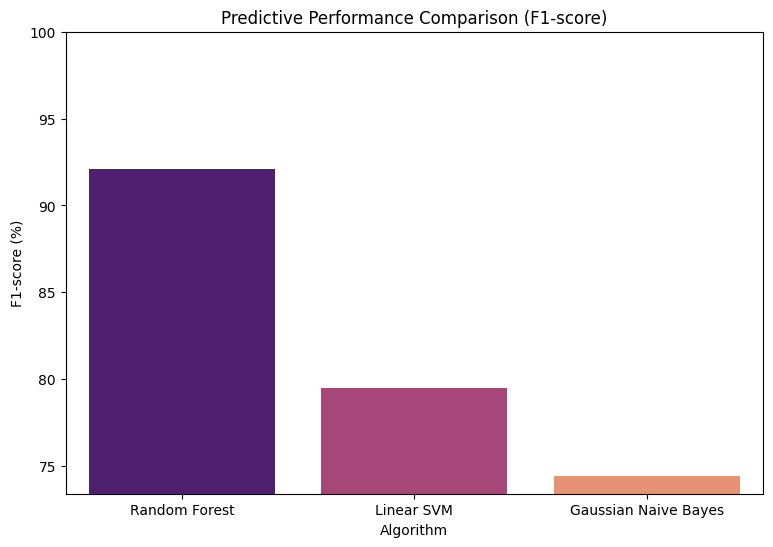

In [ ]:
# Visualize F1 score

f1_df = pd.DataFrame(f1_scores.items(), columns=['Algorithm', 'F1_Score'])
f1_df['F1_Score (%)'] = f1_df['F1_Score'] * 100
f1_df = f1_df.sort_values(by='F1_Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(9, 6))
sns.barplot(x='Algorithm', y='F1_Score (%)', data=f1_df, palette='magma')
plt.title('Predictive Performance Comparison (F1-score)')
plt.xlabel('Algorithm')
plt.ylabel('F1-score (%)')
plt.ylim(f1_df['F1_Score (%)'].min() - 1, 100)

plt.show()

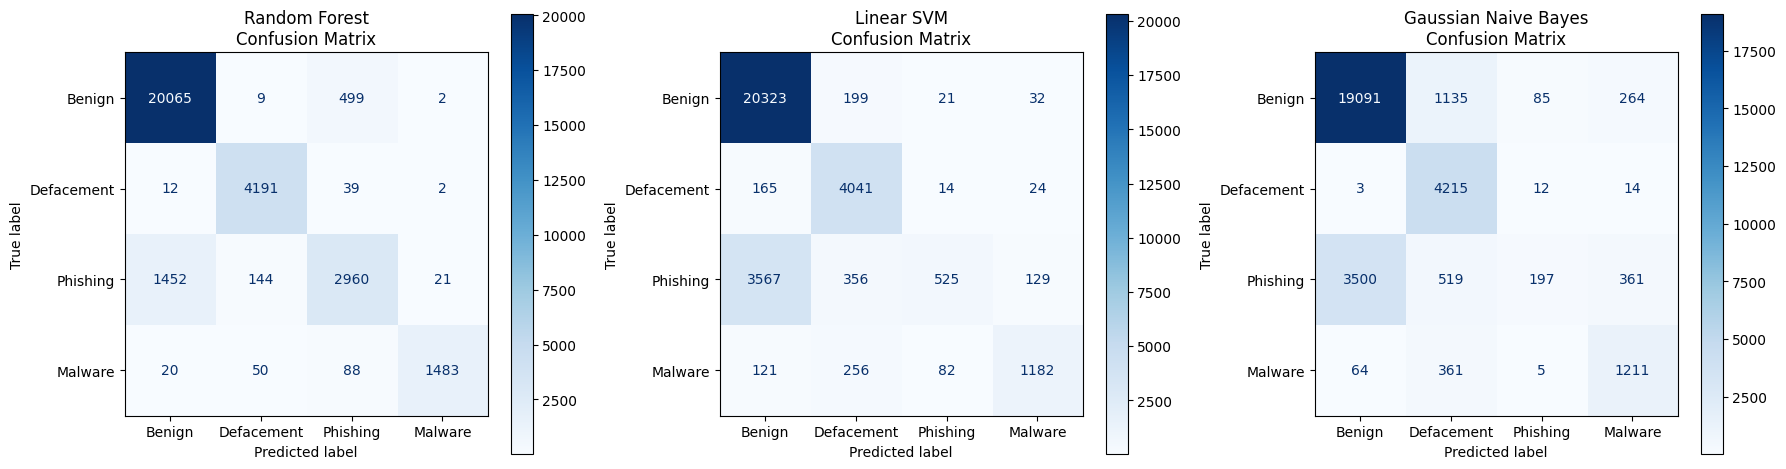

In [ ]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

class_names = ['Benign', 'Defacement', 'Phishing', 'Malware']

for idx, (name, cm) in enumerate(confusion_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{name}\nConfusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Simplified per-class metrics display
for name, cm in confusion_matrices.items():
    print(f"\n{'='*60}")
    print(f"{name}")
    print('='*60)

    for i, class_name in enumerate(class_names):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"{class_name:12s}: Precision={precision*100:5.2f}% | Recall={recall*100:5.2f}% | F1={f1*100:5.2f}%")


Random Forest
Benign      : Precision=93.11% | Recall=97.52% | F1=95.27%
Defacement  : Precision=95.38% | Recall=98.75% | F1=97.04%
Phishing    : Precision=82.54% | Recall=64.67% | F1=72.52%
Malware     : Precision=98.34% | Recall=90.37% | F1=94.19%

Linear SVM
Benign      : Precision=84.06% | Recall=98.78% | F1=90.83%
Defacement  : Precision=83.29% | Recall=95.22% | F1=88.85%
Phishing    : Precision=81.78% | Recall=11.47% | F1=20.12%
Malware     : Precision=86.47% | Recall=72.03% | F1=78.59%

Gaussian Naive Bayes
Benign      : Precision=84.26% | Recall=92.79% | F1=88.32%
Defacement  : Precision=67.66% | Recall=99.32% | F1=80.49%
Phishing    : Precision=65.89% | Recall= 4.30% | F1= 8.08%
Malware     : Precision=65.46% | Recall=73.80% | F1=69.38%


# Train on total dataset using Random Forest
    - we have evaluated all the classifiers using only 25% of the total dataset, we will now create the final model with Random Forest using the whole dataset. We will perform the same data cleaning steps as before.

In [ ]:
# check z-score outliers

# Check for outliers in url_len and letters
col = 'url_len'
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1
outliers_url_len = dataset[(dataset[col] < (Q1 - 1.5 * IQR)) | (dataset[col] > (Q3 + 1.5 * IQR))]
print(f"Outliers in '{col}': {outliers_url_len.shape[0]}")

col = 'letters'
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1
outliers_letters = dataset[(dataset[col] < (Q1 - 1.5 * IQR)) | (dataset[col] > (Q3 + 1.5 * IQR))]
print(f"Outliers in '{col}': {outliers_letters.shape[0]}")


# remove outliers both on url_length and letter count.

#url_len IQR bounds
col = "url_len"
Q1_url = dataset[col].quantile(0.25)
Q3_url = dataset[col].quantile(0.75)
IQR_url = Q3_url - Q1_url
lower_url = Q1_url - 1.5 * IQR_url
upper_url = Q3_url + 1.5 * IQR_url

# letters IQR bounds
col = "letters"
Q1_let = dataset[col].quantile(0.25)
Q3_let = dataset[col].quantile(0.75)
IQR_let = Q3_let - Q1_let
lower_let = Q1_let - 1.5 * IQR_let
upper_let = Q3_let + 1.5 * IQR_let

# Mask of non-outliers in both columns
mask_url_ok = (dataset["url_len"] >= lower_url) & (dataset["url_len"] <= upper_url)
mask_let_ok = (dataset["letters"] >= lower_let) & (dataset["letters"] <= upper_let)

total_cleaned_dataset = dataset[mask_url_ok & mask_let_ok].copy()

print("Original reduced size:", len(dataset))
print("After removing outliers:", len(total_cleaned_dataset))
print("Rows removed:", len(dataset) - len(total_cleaned_dataset))


Outliers in 'url_len': 25517
Outliers in 'letters': 25242
Original reduced size: 651000
After removing outliers: 621145
Rows removed: 29855


In [ ]:
X = total_cleaned_dataset.drop(columns=["label"])
y = total_cleaned_dataset["label"]

# we use a randomstate = 3 for consistancy though the assignment
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# normalization / scaling

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# training final model

rfc = RandomForestClassifier(random_state=42, n_estimators=50, n_jobs=2, max_depth=30)

rfc.fit(x_train_scaled, y_train)
y_pred = rfc.predict(x_test_scaled)

f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Final models F1 Score: {f1:.4f}")


Final models F1 Score: 0.9291


Final model F1 Score: 0.6938

FINAL MODEL - Per-Class Performance
Benign      : Precision=93.60% | Recall=97.66% | F1=95.59%
Defacement  : Precision=96.40% | Recall=99.60% | F1=97.98%
Phishing    : Precision=84.61% | Recall=66.94% | F1=74.74%
Malware     : Precision=99.04% | Recall=93.42% | F1=96.15%

Confusion Matrix Visualization


<Figure size 800x600 with 0 Axes>

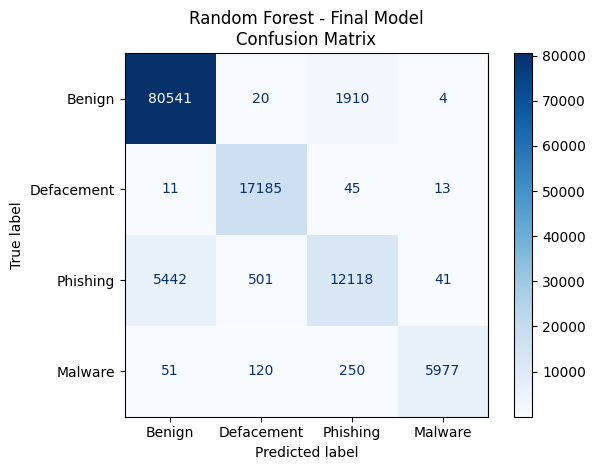

In [ ]:
cm_final = confusion_matrix(y_test, y_pred)

print(f"Final model F1 Score: {f1:.4f}")
print("\n" + "="*60)
print("FINAL MODEL - Per-Class Performance")
print("="*60)

class_names = ['Benign', 'Defacement', 'Phishing', 'Malware']

for i, class_name in enumerate(class_names):
    tp = cm_final[i, i]
    fp = cm_final[:, i].sum() - tp
    fn = cm_final[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_class = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"{class_name:12s}: Precision={precision*100:5.2f}% | Recall={recall*100:5.2f}% | F1={f1_class*100:5.2f}%")

# Visualize confusion matrix for final model
print("\n" + "="*60)
print("Confusion Matrix Visualization")
print("="*60)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_final, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest - Final Model\nConfusion Matrix')
plt.tight_layout()
plt.show()

Refrences
https://www.kaggle.com/datasets/moutasmtamimi/malicious-url-detection-dataset-enhanced-2026
https://www.kaggle.com/datasets/nhutrinhanna/malicious-and-benign-urls-datasets